## Group 24: Prediction Model for Heart Disease Diagnosis

### Introduction

In the United States of America, one person dies every 34 seconds from a heart disease (CDC, 2022). Many people who have a heart disease do not show any physical symptoms and as a result are not diagnosed (Jin 2014). In turn, these individuals are not taking medications to help prevent the progression of the heart disease. Thus, predictive models are needed to help diagnose patients especially those who are asymptomatic in order to intervene with the progression of the disease.

In this project, we examined the Heart Disease Data from the University of California, Irvine (Janosi et al., 1988). The dataset is collected from three separate countries, the United States, Switzerland, and Hungary. It is composed of 14 quantitative variables (age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, slope of the peak exercise ST segment, number of major vessels and Thalassemia).

According to the Centre for Disease and Prevention (CDC, 2022) the risk factors for a heart disease are: age, sex, high blood pressure, high cholesterol, and diabetes. Thus, from the 14 variables, we originally examined these 6 variables as they would most likely influence a diagnosis of heart disease variable. However, after our initial model creation and doing further literature review, we added two additional variables that were found to be related to heart disease (Detrano et al., 1989 and Gennari et al., 1989), chest pain (cp) and maximum heart rate achieved (thalach) to our model.

The major role of this project is to use the variables from the dataset to help predict whether a patient has a heart disease or not. 


### Methods and Results

First, we read the heart disease data directly from the UCI ICS website using read_csv(). We combined the data from the three different countries into one dataset called “heart_data”. 


In [1]:
#group 24
library (ggplot2)
library (GGally)
library (tidyverse)
library(tidymodels)
library(dplyr)
library (cowplot)
library (knitr)
set.seed (42)

hungary <- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = FALSE)
colnames(hungary) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

switzerland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = FALSE)
colnames(switzerland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

va<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = FALSE)
colnames(va) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data <- rbind (hungary,switzerland,cleveland,va)


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()


The dataset provides 14 variables; however, we examined only 6 variables initally which are:
- Age (in years)
- Sex (0= Female, 1= Male)
- A cholesterol (variable *chol*) value > 200 mg/dL is high risk for a patient to have a heart disease (UPenn Medicine, 2022)
- A blood pressure (variable *trestbps*) value > 130 mmHg is a high risk for heart disease (Heart, 2022)
- Diabetes is represented in the variable *fbs*, if fbs is >120 mg/dl it indicates diabetes (Mayo Clinic, 2022)
- Diagnosis of heart disease (variable *num*) was separated into different severity levels (0 = no disease, 1 = mild, 2 = moderate, 3 =severe, and 4 = very severe). We changed it to a binary label (0 and 1), where any num >= 1 became 1 (presence of heart disease) since we are only interested in its presence/absence.

We filtered the data to only have the variables of interest and cleaned the data by removing rows containing NAs and changed the variables to the appropriate type (trestbps into numeric, fbs to factor, num to factor, and thalach to numeric). 

In [2]:
heart_data_cleaned <- heart_data %>%
  select('age', 'sex', 'trestbps', 'chol', 'fbs', 'num', 'thalach', 'cp') %>%
  mutate(
      num = dplyr::case_when(
          num %in% c(1, 2, 3, 4) ~ 1,
          TRUE ~ 0
      )
    )%>%
  drop_na() %>%
    filter(fbs %in% c(1, 0)) %>%
   # filter(chol %in% c(1, 0)) %>%
    mutate(trestbps = as.numeric (trestbps),
           chol = as.numeric (chol),
           fbs = as_factor (fbs),
           num = as_factor(num),
           thalach = as.numeric (thalach)
  ) %>% drop_na(trestbps) %>%
        drop_na (chol)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


#### Exploratory Data Analysis

Below we performed explanatory analysis related to the creation of our classification model by creating a summary table (Table 1) and examined the distributions of the variables of interest in the training data (Figures 1-8).

In [3]:
tab <- matrix(c(nrow(heart_data_cleaned), round(mean(heart_data_cleaned$age), digits=2), sum(heart_data_cleaned$age=="?"), '28-77',
                nrow(heart_data_cleaned), "21.09% Female" ,sum(heart_data_cleaned$sex=="?"), "0 = Female, 1 = Male",
                nrow(heart_data_cleaned), round(mean(as.numeric(heart_data_cleaned$trestbps), na.rm=TRUE), digits=2), sum(heart_data_cleaned$trestbps=="?"), "0-98",
                nrow(heart_data_cleaned), round(mean(as.numeric(heart_data_cleaned$chol), na.rm=TRUE), digits=2), sum(heart_data_cleaned$chol=="?"), "0-85",
                nrow(heart_data_cleaned), "75.22% False", sum(heart_data_cleaned$fbs=="?"), "0 = False, 1 = True",
                nrow(heart_data_cleaned), "44.67% No Heart Disease",sum(is.na(heart_data_cleaned$num)), "0 = No Heart Disease, 1 = Heart Disease"), ncol=4, byrow=TRUE)
colnames(tab) <- c('Number of Observations','Mean or Proportion','Number of Missing Data', 'Range or Levels')
rownames(tab) <- c('Age (years)','Sex','Resting Blood Pressure (mmhg)','Cholesterol (mg/dl)','Fasting Blood Sugar > 120 mg/dl','Heart Disease Diagnosis')
tab <- as.table(tab)
cat ("Table 1: Summary of the Variables")
tab

Table 1: Summary of the Variables

                                Number of Observations Mean or Proportion     
Age (years)                     745                    53.13                  
Sex                             745                    21.09% Female          
Resting Blood Pressure (mmhg)   745                    132.77                 
Cholesterol (mg/dl)             745                    219.92                 
Fasting Blood Sugar > 120 mg/dl 745                    75.22% False           
Heart Disease Diagnosis         745                    44.67% No Heart Disease
                                Number of Missing Data
Age (years)                     0                     
Sex                             0                     
Resting Blood Pressure (mmhg)   0                     
Cholesterol (mg/dl)             0                     
Fasting Blood Sugar > 120 mg/dl 0                     
Heart Disease Diagnosis         0                     
                                Range or Levels               

From Table 1, we see that the proportion of observations with and without a heart disease diagnosis in the cleaned dataset are balanced (No Heart Disease = 44.67% of observations). Thus we did not need to balance the labels during the creation of our model.

Next, we split the dataset into a training (75%) and testing set (25%). We used the "tidymodels" package which automatically shuffles the original dataset and stratifies it to ensure the two split subsets of data have roughly equal proportions of the different labels.


In [4]:
#split data into training and testing data
heart_data_split <- initial_split(heart_data_cleaned, prop = 0.75, strata = num)  
heart_data_train <- training(heart_data_split)   
heart_data_test <- testing(heart_data_split)

In the following we visualize our data using **only the training set**:

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


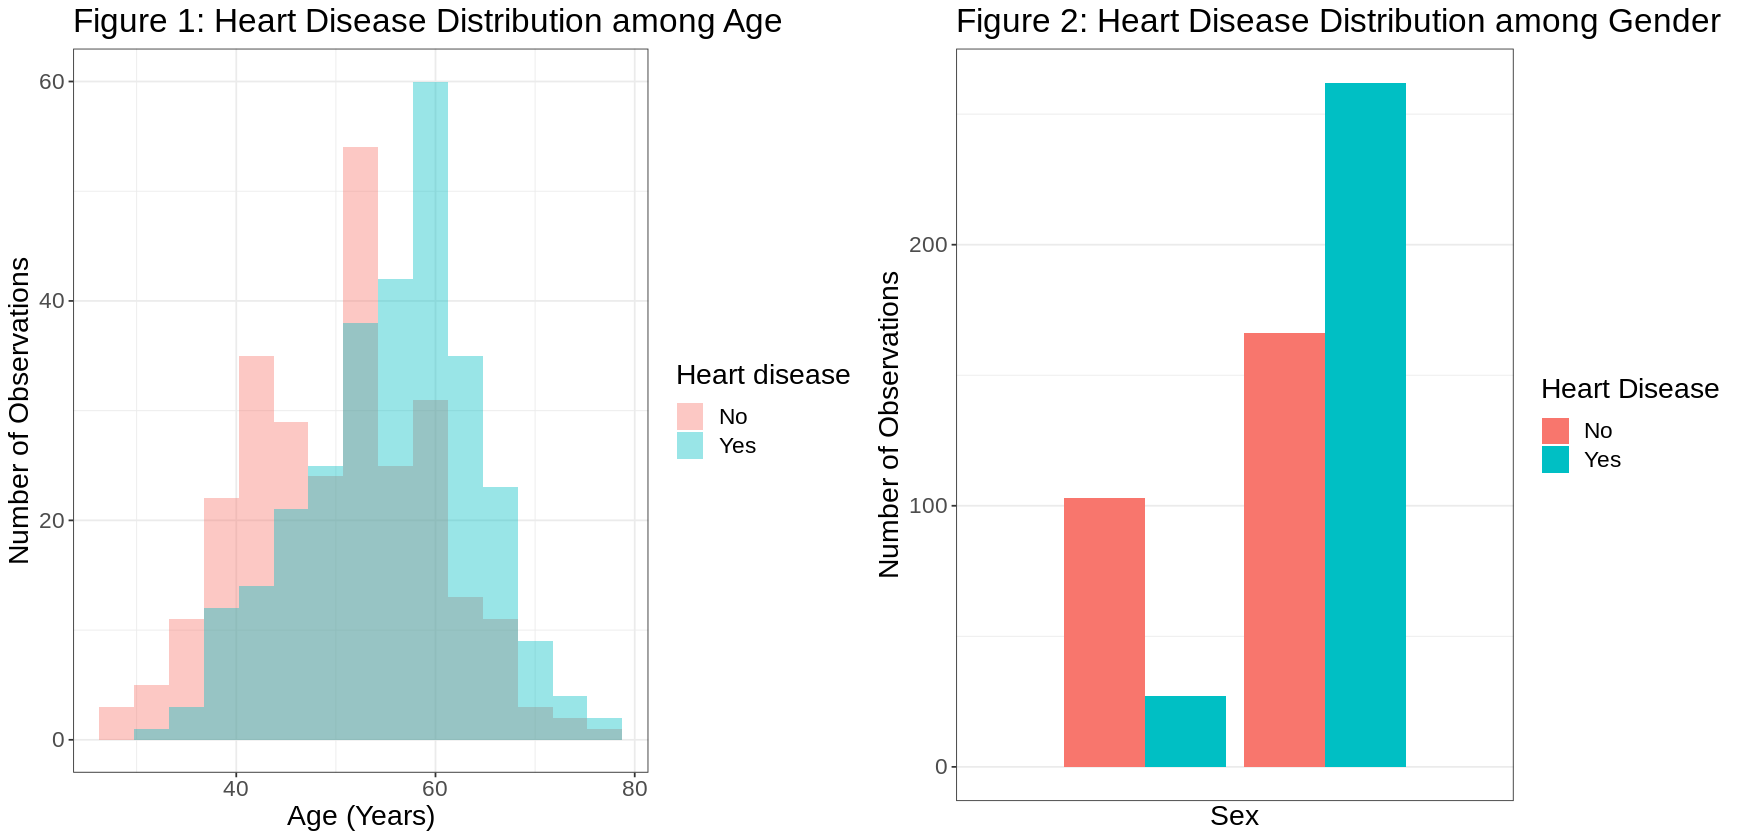

In [5]:
options(repr.plot.width = 14.5, repr.plot.height = 7)

age_distribution <- ggplot (heart_data_train, aes (x= age, fill = num))+
  geom_histogram (position = "identity", alpha = 0.4, bins =15)+
  theme_bw ()+
  xlab ("Age (Years)") +
  ylab ("Number of Observations")+
    labs (fill ="Heart disease")+
    scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 1: Heart Disease Distribution among Age")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =17))

sex_distribution <- ggplot (heart_data_train, aes (x= sex, fill = num))+
  geom_histogram (position = "dodge", stat ="count")+
  theme_bw () +
  xlab ("Sex") +
  ylab ("Number of Observations")+
  labs (fill ="Heart Disease")+
  scale_x_discrete (labels = c("0" = "Female", "1" = "Male"))+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 2: Heart Disease Distribution among Gender")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =17))

plot01 <- plot_grid (age_distribution, sex_distribution)
plot01

From figure 1, those older than 50 years old (yo) have more heart disease compared to those younger (<50 yo).

From figure 2, more males have a heart disease and less females have a heart disease, with most obversations being male in the dataset.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


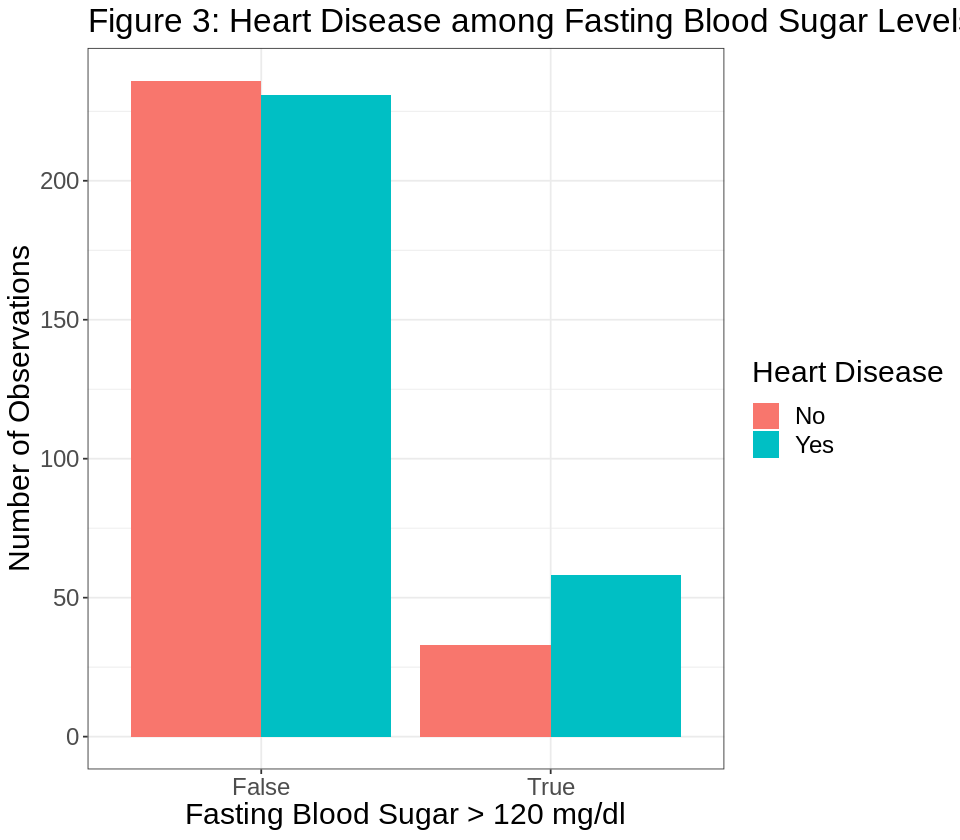

In [6]:
options(repr.plot.width = 8, repr.plot.height = 7)

fbs_distribution <- ggplot (heart_data_train, aes (x= fbs, fill = num ))+
  geom_histogram (position = "dodge", stat = "count")+
  theme_bw () +
  xlab ("Fasting Blood Sugar > 120 mg/dl") +
  ylab ("Number of Observations")+
  labs (fill ="Heart Disease")+
  scale_x_discrete (labels = c("0" = "False", "1" = "True"))+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 3: Heart Disease among Fasting Blood Sugar Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))
fbs_distribution 


From figure 3, most people have fasting blood sugar <120 mg/dl (no diabetes) with equal numbers with and without a heart disease. Those with diabetes (>120 mg/dl) have a higher proportion with heart disease. 


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


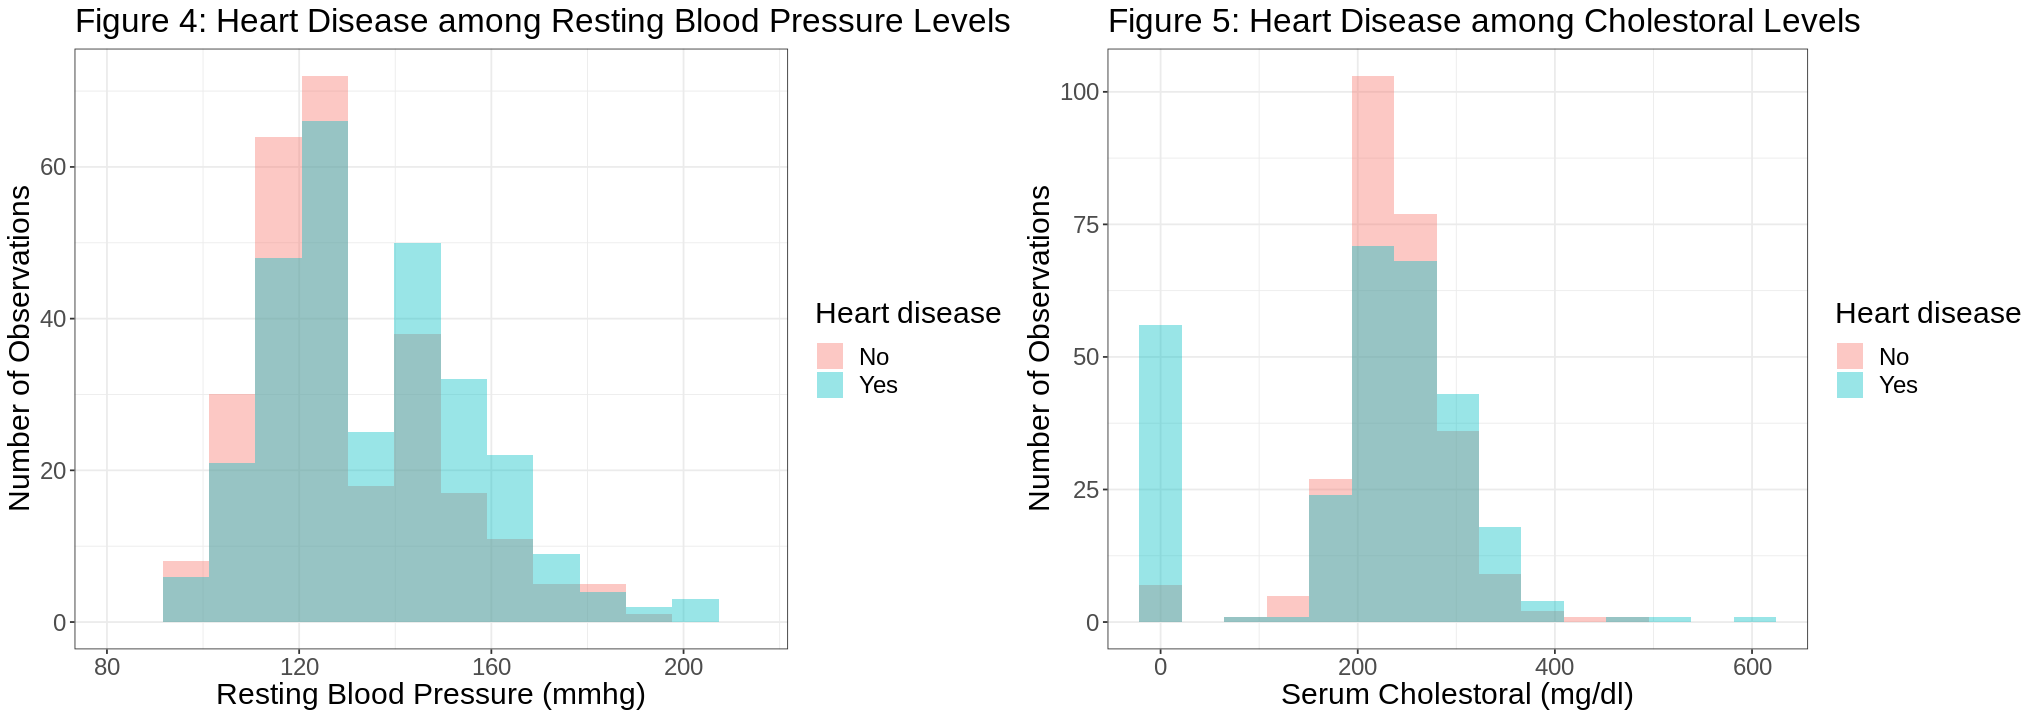

In [7]:
options(repr.plot.width = 17, repr.plot.height = 6)


trestbps_distribution <- ggplot (heart_data_train, aes (x= trestbps, fill = num))+
  geom_histogram (alpha = 0.4, bins = 15, position = "identity")+
  theme_bw ()+
  xlab ("Resting Blood Pressure (mmhg)") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
xlim (80, 215)+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 4: Heart Disease among Resting Blood Pressure Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))
 

library (tidymodels)
chol_distribution <- ggplot (heart_data_train, aes (x= chol, fill = num))+
  geom_histogram (position = "identity", bins = 15, alpha = 0.4)+
  theme_bw ()+
  xlab ("Serum Cholestoral (mg/dl)") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
  scale_fill_discrete(labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 5: Heart Disease among Cholestoral Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))

plot1.0 <- plot_grid (trestbps_distribution, chol_distribution)
plot1.0

In figure 4, most of the observations with >120 mmhg have a heart disease diagnosis, whereas the majority of people with <120 mmgh do not suffer from a heart disease. 

In figure 5, those with serum cholestoral values <100mg/dl and those with levels between 250-350 mg/dl have a higher proportion of observations with heart disease. Most people with levels between 100 - 250 mg/dl do not have a heart disaese.  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



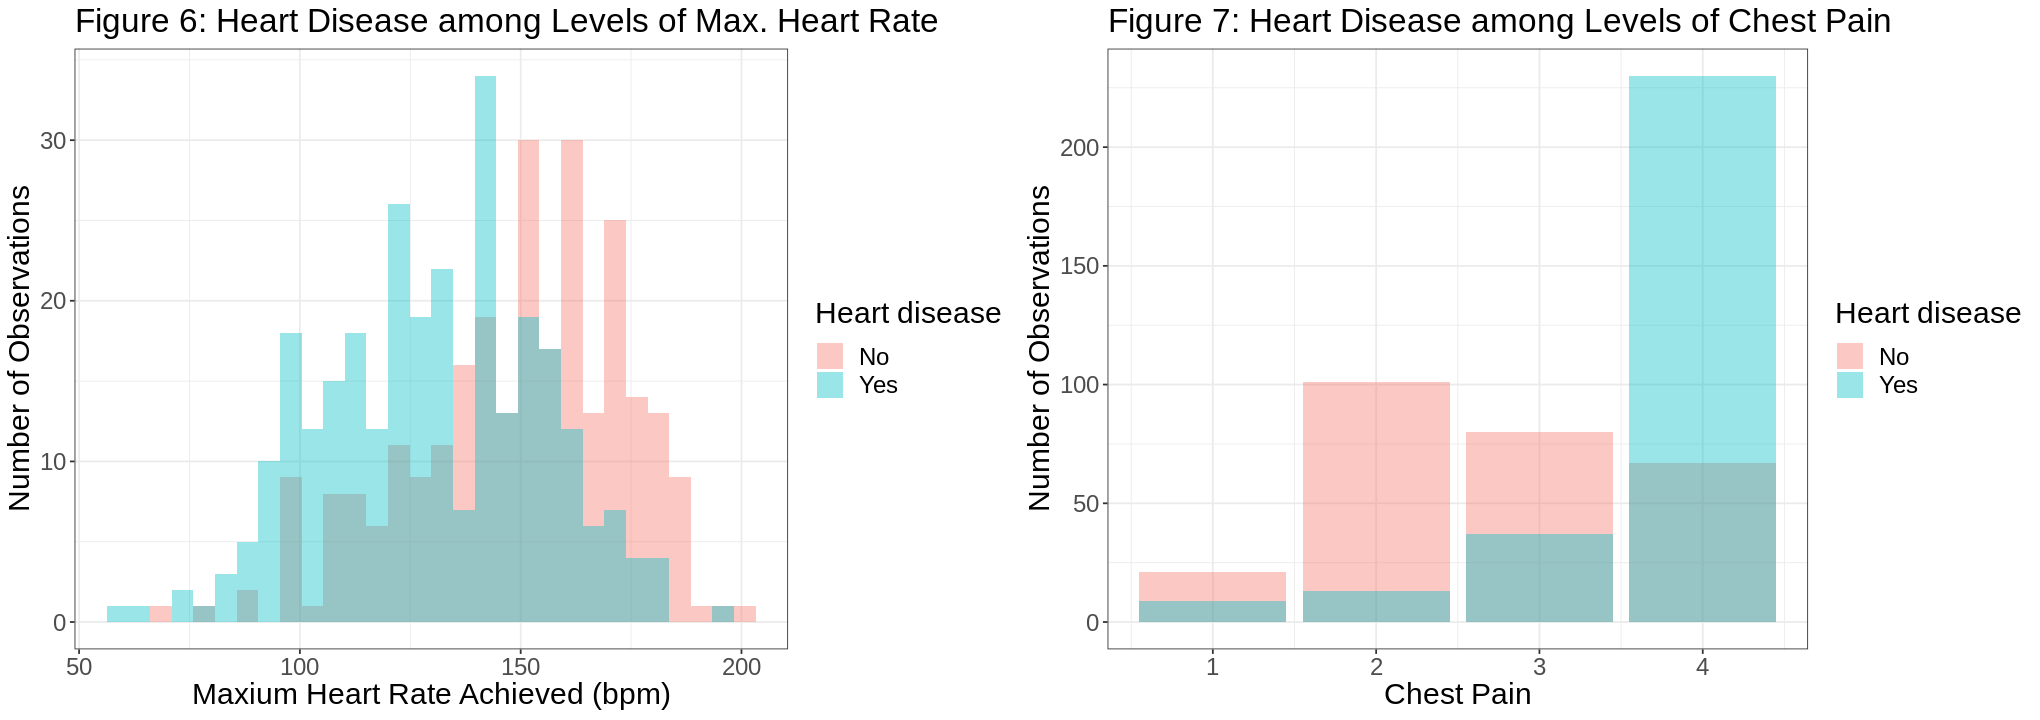

In [8]:
options(repr.plot.width = 17, repr.plot.height = 6)


thalach_distribution <- ggplot (heart_data_train, aes (x= thalach, fill = num))+
  geom_histogram (alpha = 0.4, position = "identity")+
  theme_bw ()+
  xlab ("Maxium Heart Rate Achieved (bpm)") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 6: Heart Disease among Levels of Max. Heart Rate")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))

chest_pain_distribution <- ggplot (heart_data_train, aes (x= cp, fill = num))+
  geom_bar (alpha = 0.4, position = "identity")+
  theme_bw ()+
  xlab ("Chest Pain") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 7: Heart Disease among Levels of Chest Pain")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))

plot1.1 <- plot_grid (thalach_distribution, chest_pain_distribution)
plot1.1

From Figure 6, low levels in the maximum heart rate (< 140bpm) appear to be a good indicator for a heart disease diagnosis. From Figure 7, we see that most of the observations who have a heart disease do not suffer from chest pain meaning they are asymptomatic (chest pain =4). This supports the idea that good diagnosis methods for asymptomatic patients are needed. 

In the next graph we want to examine whether there is a relationship between the predictors by using the ggpairs () function from the GGally package. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



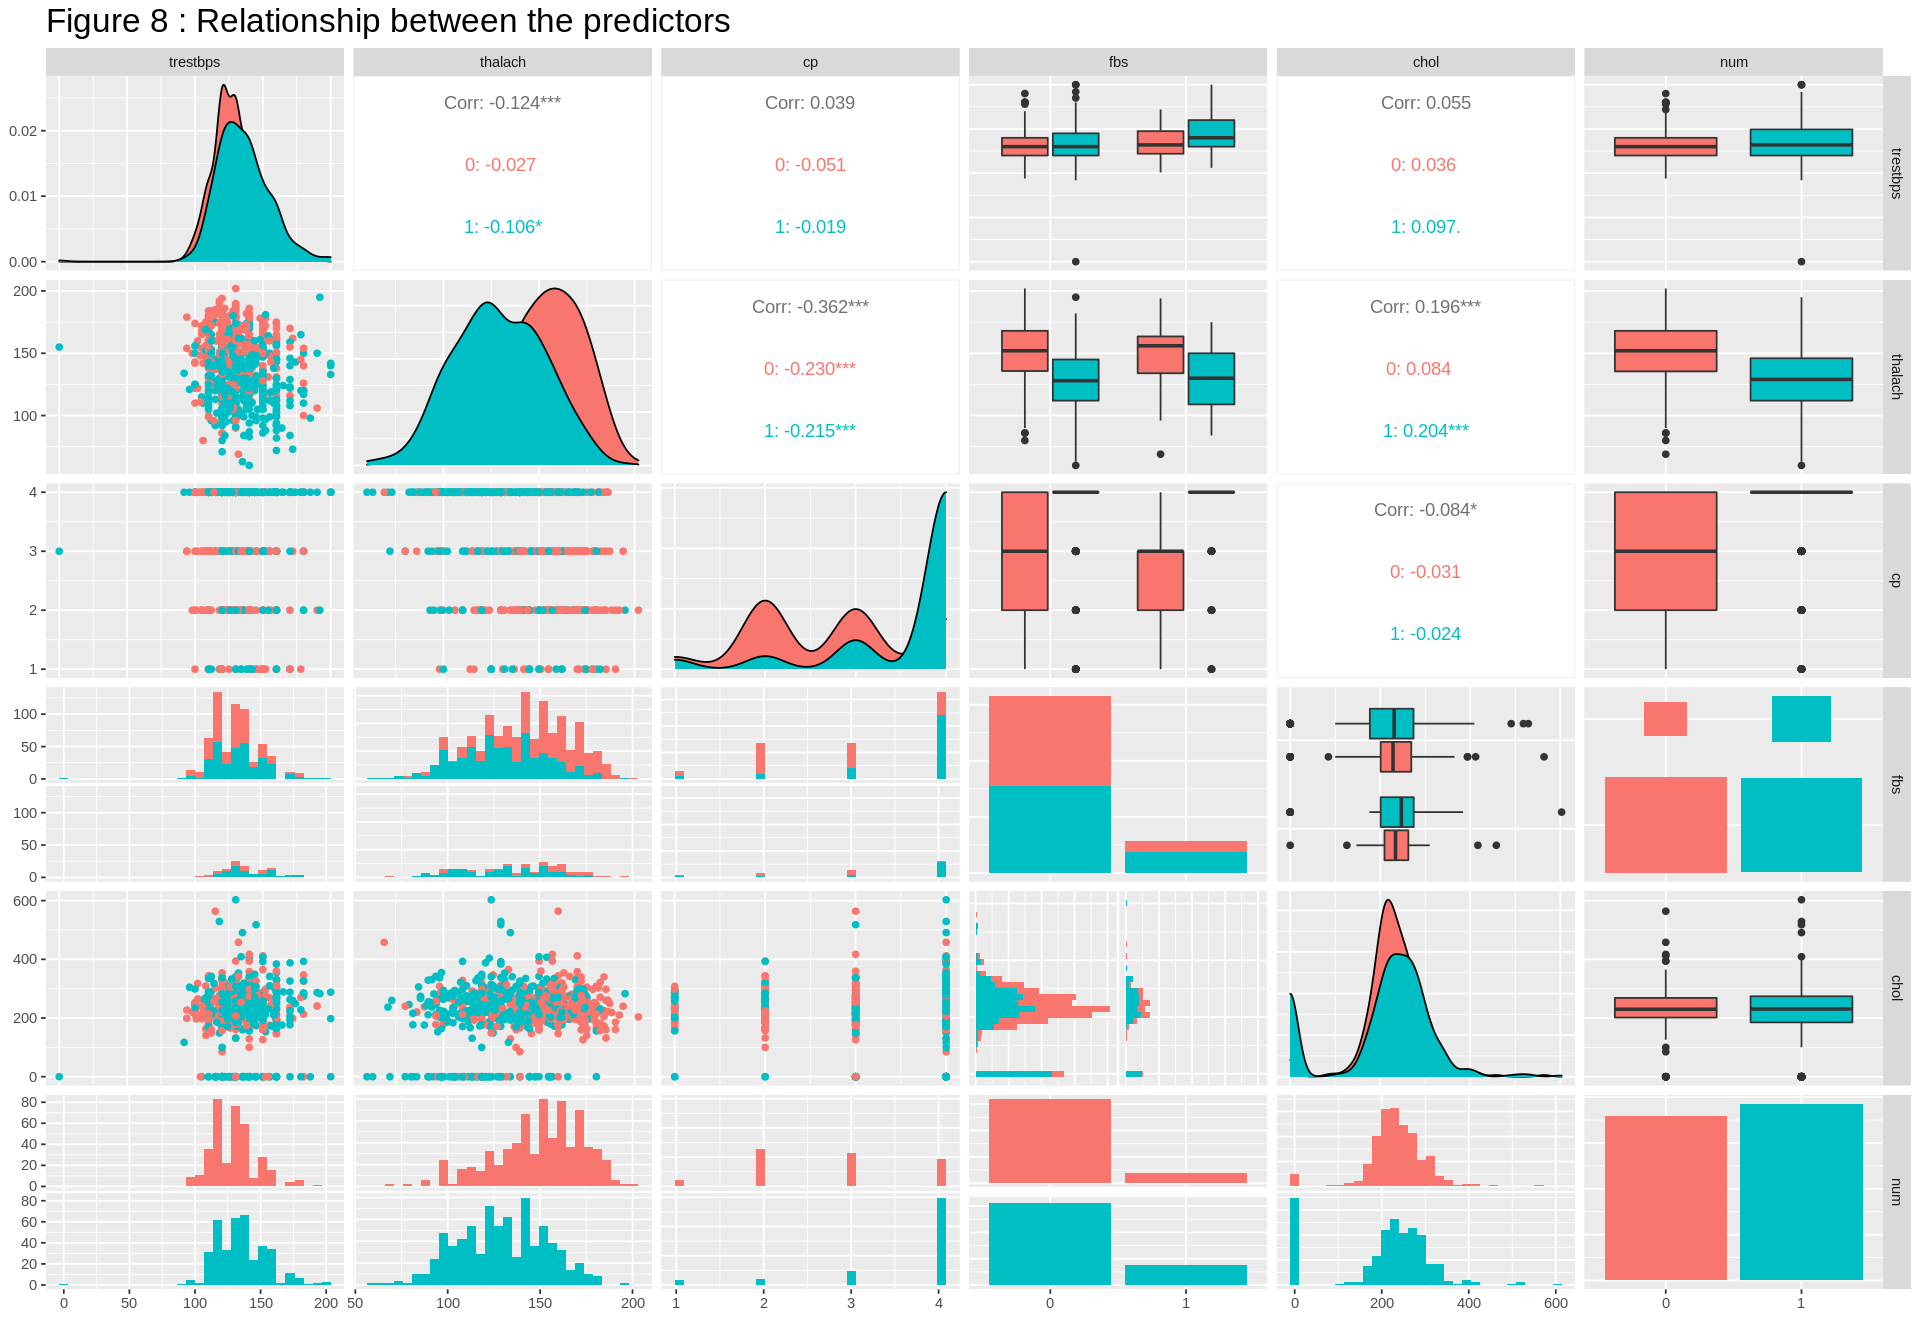

In [9]:
options(repr.plot.width = 16, repr.plot.height = 11)
heart_disease_ggpairs <- heart_data_cleaned |>
select (trestbps, thalach, cp, fbs, chol, num) |>
ggpairs (aes(color =num), title="Figure 8 : Relationship between the predictors") +
theme(plot.title = element_text(size=20))

heart_disease_ggpairs

From Figure 8, the variables show no correlation with one another. This can be confirmed by looking at correlation coefficients which measures the degree of the linear relationship. However, there is a weak negative relationship between chest pain and maximum heart rate achieved (corr.: -0.36).

#### Creating the model

After, we created the recipe for the creation of our classification model using the nearest_neighbor() function.

In [5]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune ()) |>
            set_engine("kknn") |>
            set_mode("classification")

We prepared for the cross-validation step using vfold_cv(), inidicating that we wanted 5 folds and to use num (heart disease diagnosis) as the strata.

In [6]:
knn_vfold <- vfold_cv (heart_data_train, v = 5, strata = num)

Next we created the recipe for the classification model where we indicated the predictor variables of interest, response variable, the dataset of interest, and that the numeric data were to be scaled and centered.

In [7]:
heart_recipe <- recipe (num ~ trestbps+fbs+age+sex+chol, data = heart_data_train) |>
step_scale (age, trestbps, chol) |>
step_center (age, trestbps, chol)


After this step, we performed cross-validation on the training data set to find the best k value (number of neighbors) for our model and used the workflow() function to create our model. Before that, we specified a range for  that lies between the values one and fifteen. Then we plotted the graph of each k against its accuracy. 
##add a line

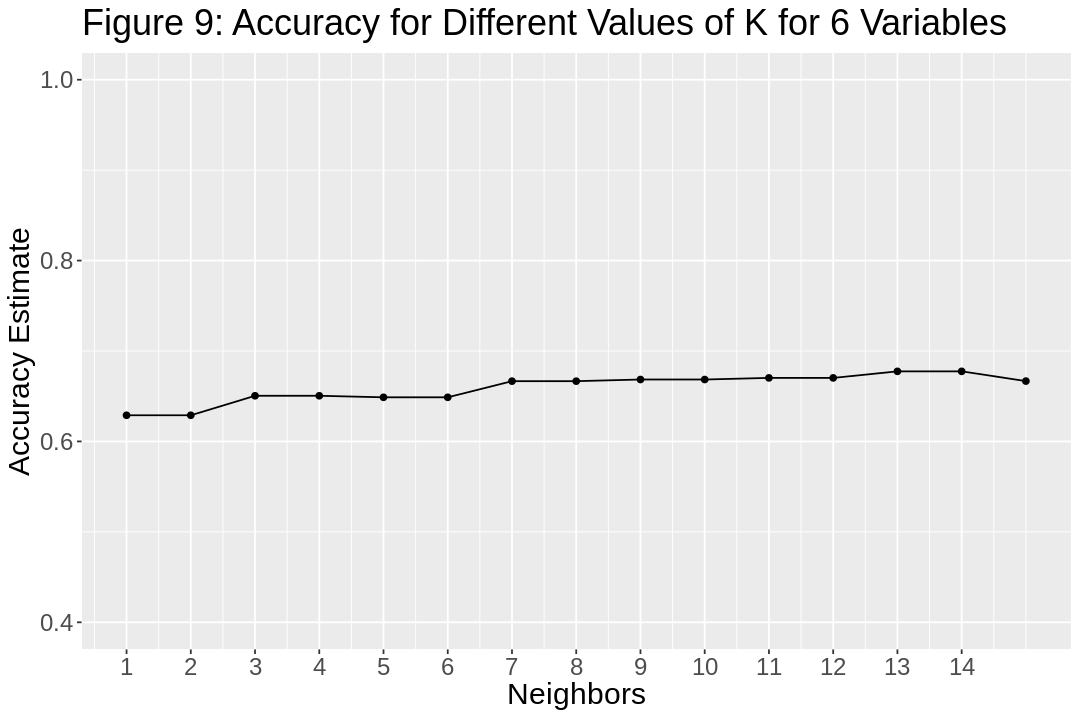

In [8]:
options(repr.plot.width = 9, repr.plot.height = 6)

gridvals <- tibble (neighbors = seq (1,15))
knn_results <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_tune) %>%
               tune_grid(resamples = knn_vfold, grid = gridvals) %>%
               collect_metrics()

knn_accuracy <- knn_results |>
filter (.metric == "accuracy")

accuracy_plot <- ggplot (knn_accuracy,  aes (x= neighbors, y= mean)) +
geom_point () +
geom_line() +
xlab ("Neighbors") +
ylab ("Accuracy Estimate") +
theme(text = element_text(size = 18)) +
scale_x_continuous(breaks = seq(0, 14, by = 1)) +
scale_y_continuous(limits = c(0.4, 1.0))+
ggtitle ("Figure 9: Accuracy for Different Values of K for 6 Variables")
accuracy_plot


From Figure 9, we chose 5 to be our "k" as it gives us a good accuracy and changing the value to a nearby 1 (increasing or decreasing by a small number) doesn't change the accuracy too much.

In [9]:
#we can see in this graph that k=5 seems to be a good value
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_spec) |>
               fit (heart_data_train)

knn_predict <- knn_fit |>
predict (heart_data_test) |>
bind_cols (heart_data_test)

knn_metrics <- knn_predict |>
metrics (truth = num, estimate= .pred_class)
cat ("Table 2: Metrics for the Classification Model with 6 Variables")
knn_metrics

Table 2: Metrics for the Classification Model with 6 Variables

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6524064
kap,binary,0.3057856


However, from Table 2 we found less accuracy than expected for our model. Thus, we re-examined existing literature and added two additional variables to our model (the Maximum Heart Rate achieved (thalach) and Chest Pain (cp)) which were associated with heart disease (Detrano et al., 1989 and Gennari et al., 1989). Then we repeated the same steps as above. 

The two additional variables we utilized were:
- A value of 4 in the chest pain (variable *cp*) variable indicates no chest pain and anything between 0-3 indicates chest pain from the dataset. 
- Maximum Heart Rate (variable *thalach*)

In [10]:
heart_recipe_new <- recipe (num ~ trestbps+fbs+age+sex+chol+thalach+cp, data = heart_data_train) |>
step_scale (age, trestbps, chol, thalach,cp) |>
step_center (age, trestbps, chol, thalach, cp)

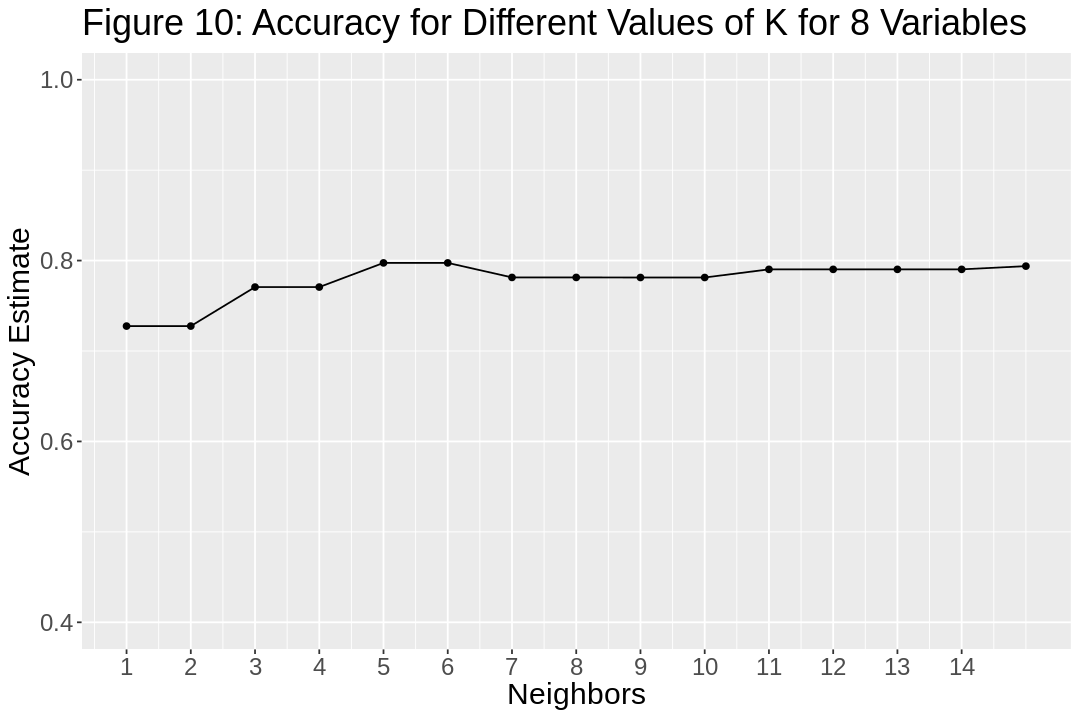

In [12]:
options(repr.plot.width = 9, repr.plot.height = 6)

gridvals <- tibble (neighbors = seq (1,15))
knn_results_new <- workflow() |>
               add_recipe(heart_recipe_new) |>
               add_model(knn_tune) %>%
               tune_grid(resamples = knn_vfold, grid = gridvals) %>%
               collect_metrics()

knn_accuracy_new <- knn_results_new |>
filter (.metric == "accuracy")

accuracy_plot <- ggplot (knn_accuracy_new, aes (x= neighbors, y= mean)) +
geom_point () +
geom_line ()+
xlab ("Neighbors") +
ylab ("Accuracy Estimate") +
theme(text = element_text(size = 18)) +
scale_x_continuous(breaks = seq(0, 14, by = 1)) +
scale_y_continuous(limits = c(0.4, 1.0))+
ggtitle ("Figure 10: Accuracy for Different Values of K for 8 Variables")
accuracy_plot


From Figure 10, we chose 6 to be our "k" as it gave optimal accuracy and changing the value to a nearby 1 (increasing or decreasing by a small number) doesn't change the accuracy too much 

In [17]:
#we can see in this graph that k=6 seems to be a good value
knn_spec <- knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit_new <- workflow() |>
               add_recipe(heart_recipe_new) |>
               add_model(knn_spec) |>
               fit (heart_data_train)


#### Measuring model accuracy

In [18]:
knn_predict_new <- knn_fit_new |>
predict (heart_data_test) |>
bind_cols (heart_data_test)

knn_metrics <- knn_predict_new |>
metrics (truth = num, estimate= .pred_class)
cat ("Table 3: Metrics for the Classification Model with 8 Variables")
knn_metrics

Table 3: Metrics for the Classification Model with 8 Variables

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7326203
kap,binary,0.4644903


From Table 3, the accuracy of our new model is higher (73% vs 65%) in our new model compared to the previous one. Thus, it signals that adding the two new variables was important to our model.

In [19]:
#create a confusion matrix
heart_conf_matrix <- knn_predict_new |>
conf_mat (truth = num, estimate = .pred_class)
cat ("Table 4: Confusion Matrix for the Classification Model")
heart_conf_matrix

Table 4: Confusion Matrix for the Classification Model

          Truth
Prediction  0  1
         0 65 25
         1 25 72

From Table 4, we see that for the majority of the time, our model predicts if someone has a heart disease or not well (65/183 for true negative and 72/183 for true positive). However, it's important to note that our false positive and false negative rates are both 25/183.

To understand the accuracy of the model graphically, we created four plots. In the first two plots (Figures 11 and 12), we plotted maximum heart rate vs serum cholesterol while coloring the data points based on heart disease presence. In the second group of plots (Figures 13 and 14), we examined resting blood pressure vs age. Figures 11 and 13 were both created using the predicted heart disease diagnosis from our model, and Figures 12 and 14 were from the actual diagnosis from the original dataset.

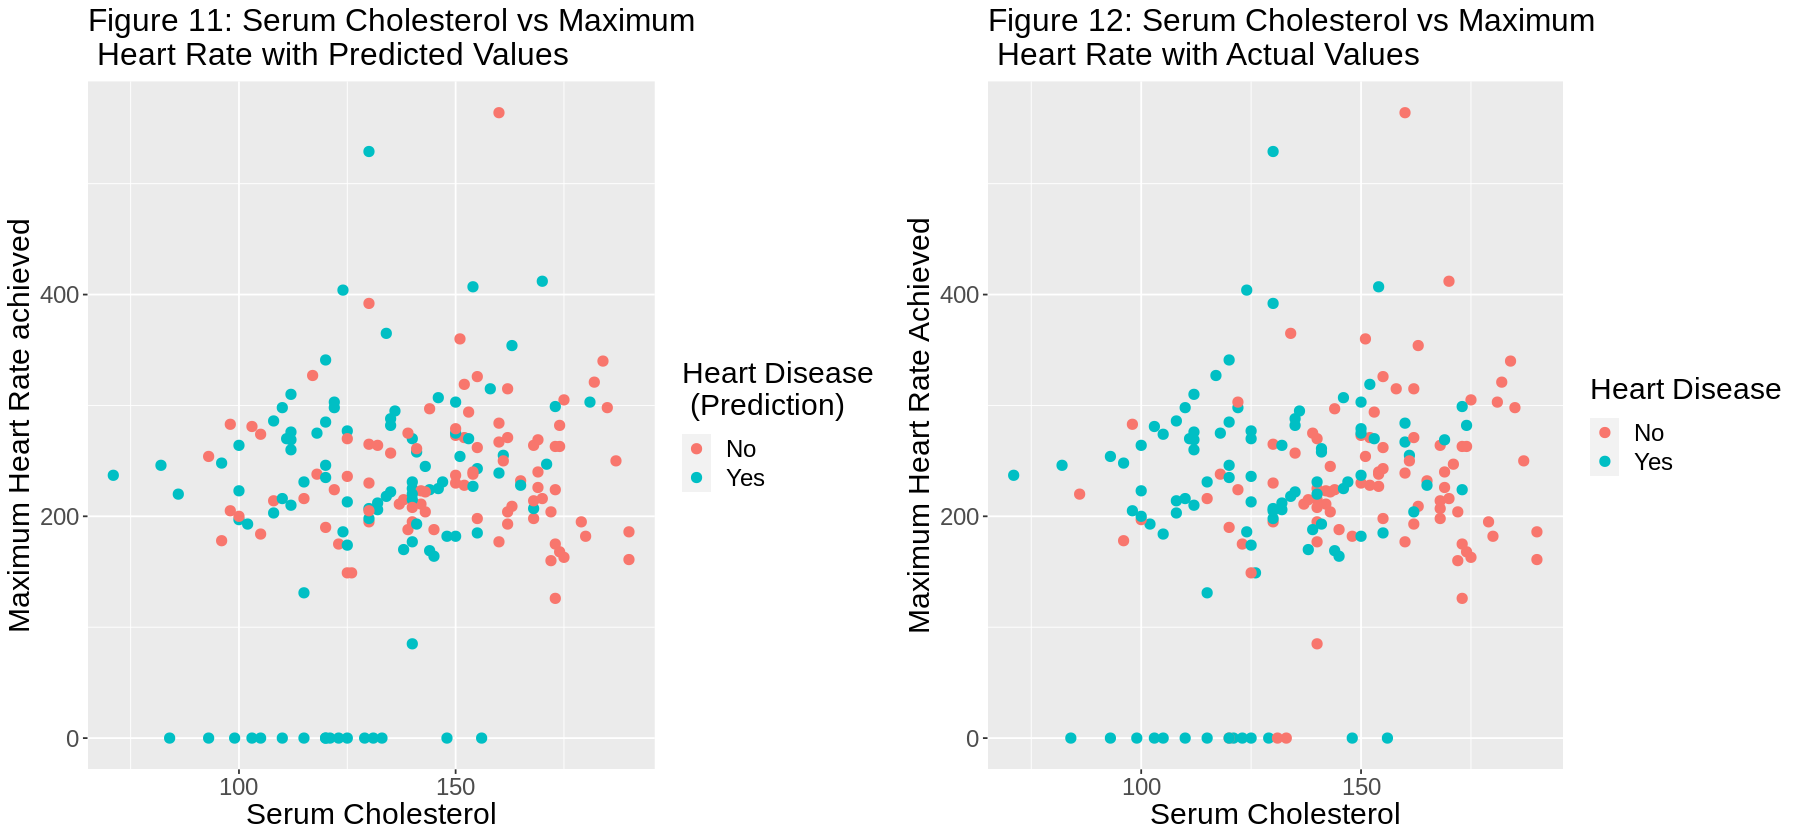

In [20]:
options(repr.plot.width = 15, repr.plot.height = 7)
prediction_plot <- ggplot (knn_predict_new, aes (x=thalach, y= chol)) +
geom_point (aes(color = .pred_class), size = 2.5) +
xlab ("Serum Cholesterol")+
ylab ("Maximum Heart Rate achieved")+
labs (color="Heart Disease \n (Prediction)")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme(plot.title = element_text(size=19))+
theme (text = element_text (size =18))+
ggtitle ("Figure 11: Serum Cholesterol vs Maximum \n Heart Rate with Predicted Values")


actual_plot <- ggplot (knn_predict_new, aes (x=thalach, y= chol)) +
geom_point (aes(color = num), size = 2.5) +
xlab ("Serum Cholesterol")+
ylab ("Maximum Heart Rate Achieved")+
labs (color = "Heart Disease")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme(plot.title = element_text(size=19))+
theme (text = element_text (size =18))+
ggtitle ("Figure 12: Serum Cholesterol vs Maximum \n Heart Rate with Actual Values")
 

plot_grid (prediction_plot, actual_plot, nrow = 1)
#size of label and points

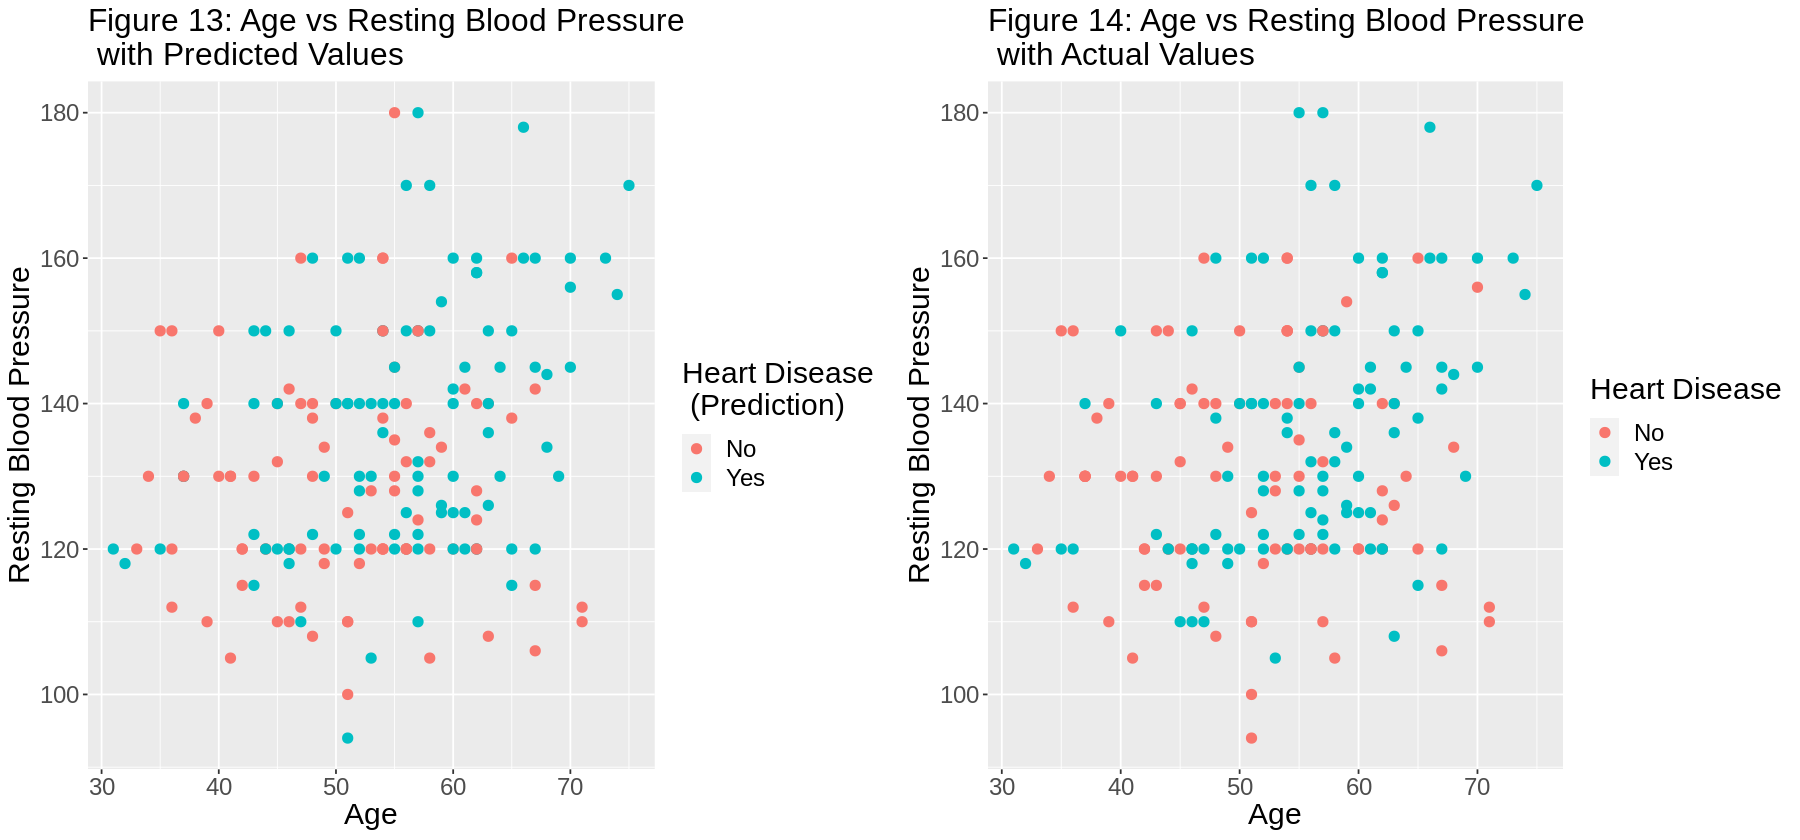

In [21]:
options(repr.plot.width = 15, repr.plot.height = 7)
prediction_plot <- ggplot (knn_predict_new, aes (x=age, y= trestbps)) +
geom_point (aes(color = .pred_class), size = 2.5) +
xlab ("Age")+
ylab ("Resting Blood Pressure")+
labs (color="Heart Disease \n (Prediction)")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
theme(plot.title = element_text(size=19))+
theme (text = element_text (size =18))+
ggtitle ("Figure 13: Age vs Resting Blood Pressure \n with Predicted Values")


actual_plot <- ggplot (knn_predict_new, aes (x=age, y= trestbps)) +
geom_point (aes(color = num), size = 2.5) +
xlab ("Age")+
ylab ("Resting Blood Pressure")+
labs (color = "Heart Disease")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
theme(plot.title = element_text(size=19))+
theme (text = element_text (size =18))+
ggtitle ("Figure 14: Age vs Resting Blood Pressure \n with Actual Values")
 

plot_grid (prediction_plot, actual_plot, nrow = 1)

From Figure 11-14, we see that visually, the graph with the predicted values (Figures 11 and 13) and the corresponding graph for the actual values  (Figure 12 and 14) of the heart disease diagnosis seem pretty similar. Thus visually, it appears that our model does well to predict the heart disease diagnosis.

#### Discussion

In summary, we created a classification model with k=5 (Figure 9) and an accuracy of 65% (Table 2) in order to predict the presence or absence of a heart disease based on five variables, age, sex, blood pressure, cholestrol, and fasting blooding sugar. An accuracy of 65 % is lower than what we expected to find since we were examining variables that were risk factors for heart disease according to the CDC. Therefore, we performed further literature review and found two variables, chest pain presence and maximum heart rate to be associated with heart disease (Detrano et al., 1989 and Gennari et al., 1989). Thus, we added the variables "cp" and "thalach" corresponding to chest pain presence and maximum heart rate to our classifcation model. From our cross-validation results, a k-value of 6 gave optimal accuracy as seen in Figure 10. Including these two variables increased our accuracy to 73% (Table 3). Thus, it showed that these variables were important and relevant to our classification model. What the accuracy tells us is that 73% of the time (73 out of 100), our model will predict the presence or absence of a heart disease correctly.

Next, we created four plots to examine the model visually (Figure 11-14). Thereby we compared actual heart disease diagnoses with the predicted values. Visually, the plots from both sets looked similar between the predicted and actual value. Thus, visually, it appears to be doing a decent job at predicting the presence or absence of a heart disease. The results from the plots were as expected as we would expect the model to predict correctly the presence of a heart disease 73% of the time. However, it's important to note that just examining the model visually is not a good indication of the fit of the model, it is imperative we calculate the accuracy which we have done in Table 3.

Thus with our predictive model, we can help diagnose patients with or without symptoms based on 7 different variables. However, since our model only has a 73% accuracy level it may not be suitable for use in a clinical setting as is. This is because we could misdiagnose 27% of the patients using our model which could be costly for patients and the healthcare system. Similarly, from the confusion matrix (Table 4) we see that many people have asymptomatic heart diseases which are often undiagnosed (Table 4; 25 patients are false negatives) and in turn not treated for their disease. This could affect their quality of life. Thus, in order to use a predictive model such as ours in a clinical setting, the model needs to be further tuned to increase the accuracy. Some ways to do so is examining whether there are additional variables that could be added to create the model which are relevant to heart disease.

From our project, future questions can predict the severity level of the heart disease by including the original levels (0-4) of the "num" variable from the original data set (we changed it to a binary variable for this project). This would be an expansion to our current project where we only ask whether someone has a heart disease or not and not the severity.

**References:**

1. CDC. (2022, October 14). Heart disease facts. Centers for Disease Control and Prevention. Retrieved October 17, 2022, from https://www.cdc.gov/heartdisease/facts.htm 
2. CDC. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. Retrieved October 18, 2022, from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm 
3. Dai, H., Bragazzi, N. L., Younis, A., Zhong, W., Liu, X., Wu, J., & Grossman, E. (2021). Worldwide trends in prevalence, mortality, and disability-adjusted life years for hypertensive heart disease from 1990 to 2017. Hypertension, 77(4), 1223-1233.
4. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
5. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
6. Heart. (2022, October 31). Understanding blood pressure readings. www.heart.org. Retrieved November 28, 2022, from https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings 
7. Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease Data Set, UCI Machine Learning Repository.
8. Mayo Clinic. (2022, November 19). Prediabetes. Mayo Clinic. Retrieved November 28, 2022, from https://www.mayoclinic.org/diseases-conditions/prediabetes/diagnosis-treatment/drc-20355284#:~:text=Fasting%20blood%20sugar%20test&text=L)%20of%20blood.-,In%20general%3A,tests%20is%20diagnosed%20as%20diabetes 
9. UPenn medicine. (2022). Pennmedicine.org. Retrieved November 28, 2022, from https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2015/february/protecting-your-heart-what-is-a-healthy-cholesterol-level-for-you 
